# Multiple Linear Regression Assignemt
## Prediction of car prices
### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:
    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Reading and Understanding the data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', max_open_warning = 0)
# the commonly used alias for seaborn is sns
import seaborn as sns
import glob, os

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Check the head of the dataset
car = pd.read_csv("CarPrice_Assignment.csv")
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0

### Inspect the various aspects of the car dataframe

In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight   curbweight  enginesize   boreratio      stroke  compressionratio  horsepower      peakrpm     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   205.000000  205.000000  205.000000  205.000000        205.000000  205.000000   205.000000  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878  2555.565854  126.907317    3.329756    3.255415         10.142537  104.117073  5125.121951   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   520.680204   41.642693    0.270844    0.313597          3.972040   39.544167   476.985643    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000  1488.000000   61.000000    2.540000    2.070000          7.000000   48.000000  4150.000000   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000  2145.000000   97.000000    3.150000    3.110000          8.600000   70.000000  4800.000000   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000  2414.000000  120.000000    3.310000    3.290000          9.000000   95.000000  5200.000000   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000  2935.000000  141.000000    3.580000    3.410000          9.400000  116.000000  5500.000000   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000  4066.000000  326.000000    3.940000    4.170000         23.000000  288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], dtype='object')

In [8]:
# new data frame with split value columns 
new = car["CarName"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
car["car_brand"]= new[0] 
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price    car_brand
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [9]:
car = car.replace(to_replace ="vokswagen", 
                 value ="volkswagen")
car

car_ID  symboling                          CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand
0         1          3               alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero
1         2          3              alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero
2         3          1         alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero
3         4          2                      audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi
4         5          2                       audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi
5         6          2                         audi fox      gas        std        two        sedan        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi
6         7          1                       audi 100ls      gas        std       four        sedan        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi
7         8          1                        audi 5000      gas        std       four        wagon        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi
8         9          1                        audi 4000      gas      turbo       four        sedan        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi
9        10          0              audi 5000s (diesel)      gas      turbo        two    hatchback        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi
10       11          2                         bmw 320i      gas        std        two        sedan        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw
11       

In [10]:
car = car.replace(to_replace ="vw", 
                 value ="volkswagen")
car

car_ID  symboling                          CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand
0         1          3               alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero
1         2          3              alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero
2         3          1         alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero
3         4          2                      audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi
4         5          2                       audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi
5         6          2                         audi fox      gas        std        two        sedan        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi
6         7          1                       audi 100ls      gas        std       four        sedan        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi
7         8          1                        audi 5000      gas        std       four        wagon        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi
8         9          1                        audi 4000      gas      turbo       four        sedan        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi
9        10          0              audi 5000s (diesel)      gas      turbo        two    hatchback        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi
10       11          2                         bmw 320i      gas        std        two        sedan        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw
11       

In [11]:
car = car.replace(to_replace ="Nissan", 
                 value ="nissan")
car

car_ID  symboling                          CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand
0         1          3               alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero
1         2          3              alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero
2         3          1         alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero
3         4          2                      audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi
4         5          2                       audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi
5         6          2                         audi fox      gas        std        two        sedan        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi
6         7          1                       audi 100ls      gas        std       four        sedan        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi
7         8          1                        audi 5000      gas        std       four        wagon        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi
8         9          1                        audi 4000      gas      turbo       four        sedan        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi
9        10          0              audi 5000s (diesel)      gas      turbo        two    hatchback        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi
10       11          2                         bmw 320i      gas        std        two        sedan        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw
11       

In [12]:
car = car.replace(to_replace ="porcshce", 
                 value ="porsche")
car

car_ID  symboling                          CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand
0         1          3               alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero
1         2          3              alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero
2         3          1         alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero
3         4          2                      audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi
4         5          2                       audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi
5         6          2                         audi fox      gas        std        two        sedan        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi
6         7          1                       audi 100ls      gas        std       four        sedan        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi
7         8          1                        audi 5000      gas        std       four        wagon        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi
8         9          1                        audi 4000      gas      turbo       four        sedan        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi
9        10          0              audi 5000s (diesel)      gas      turbo        two    hatchback        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi
10       11          2                         bmw 320i      gas        std        two        sedan        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw
11       

In [13]:
car_price = car.copy()
car_price.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price    car_brand
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [14]:
# Remove column name 'CarName' 
car_price = car_price.drop(['CarName'], axis = 1) 
car_price.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price    car_brand
0       1          3      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1       2          3      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2       3          1      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3       4          2      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4       5          2      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [15]:
car_price.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'car_brand'], dtype='object')

In [16]:
car_price = car_price.drop(['car_ID'], axis = 1) 
car_price

symboling fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand
0            3      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero
1            3      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero
2            1      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero
3            2      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi
4            2      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi
5            2      gas        std        two        sedan        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi
6            1      gas        std       four        sedan        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi
7            1      gas        std       four        wagon        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi
8            1      gas      turbo       four        sedan        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi
9            0      gas      turbo        two    hatchback        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi
10           2      gas        std        two        sedan        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw
11           0      gas        std       four        sedan        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16925.000          bmw
12           0      gas        std        two        sedan        rwd          front      101.2      176.8      64.8       54.3        2710        ohc            six         164       mpfi       3.31   3.190  

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

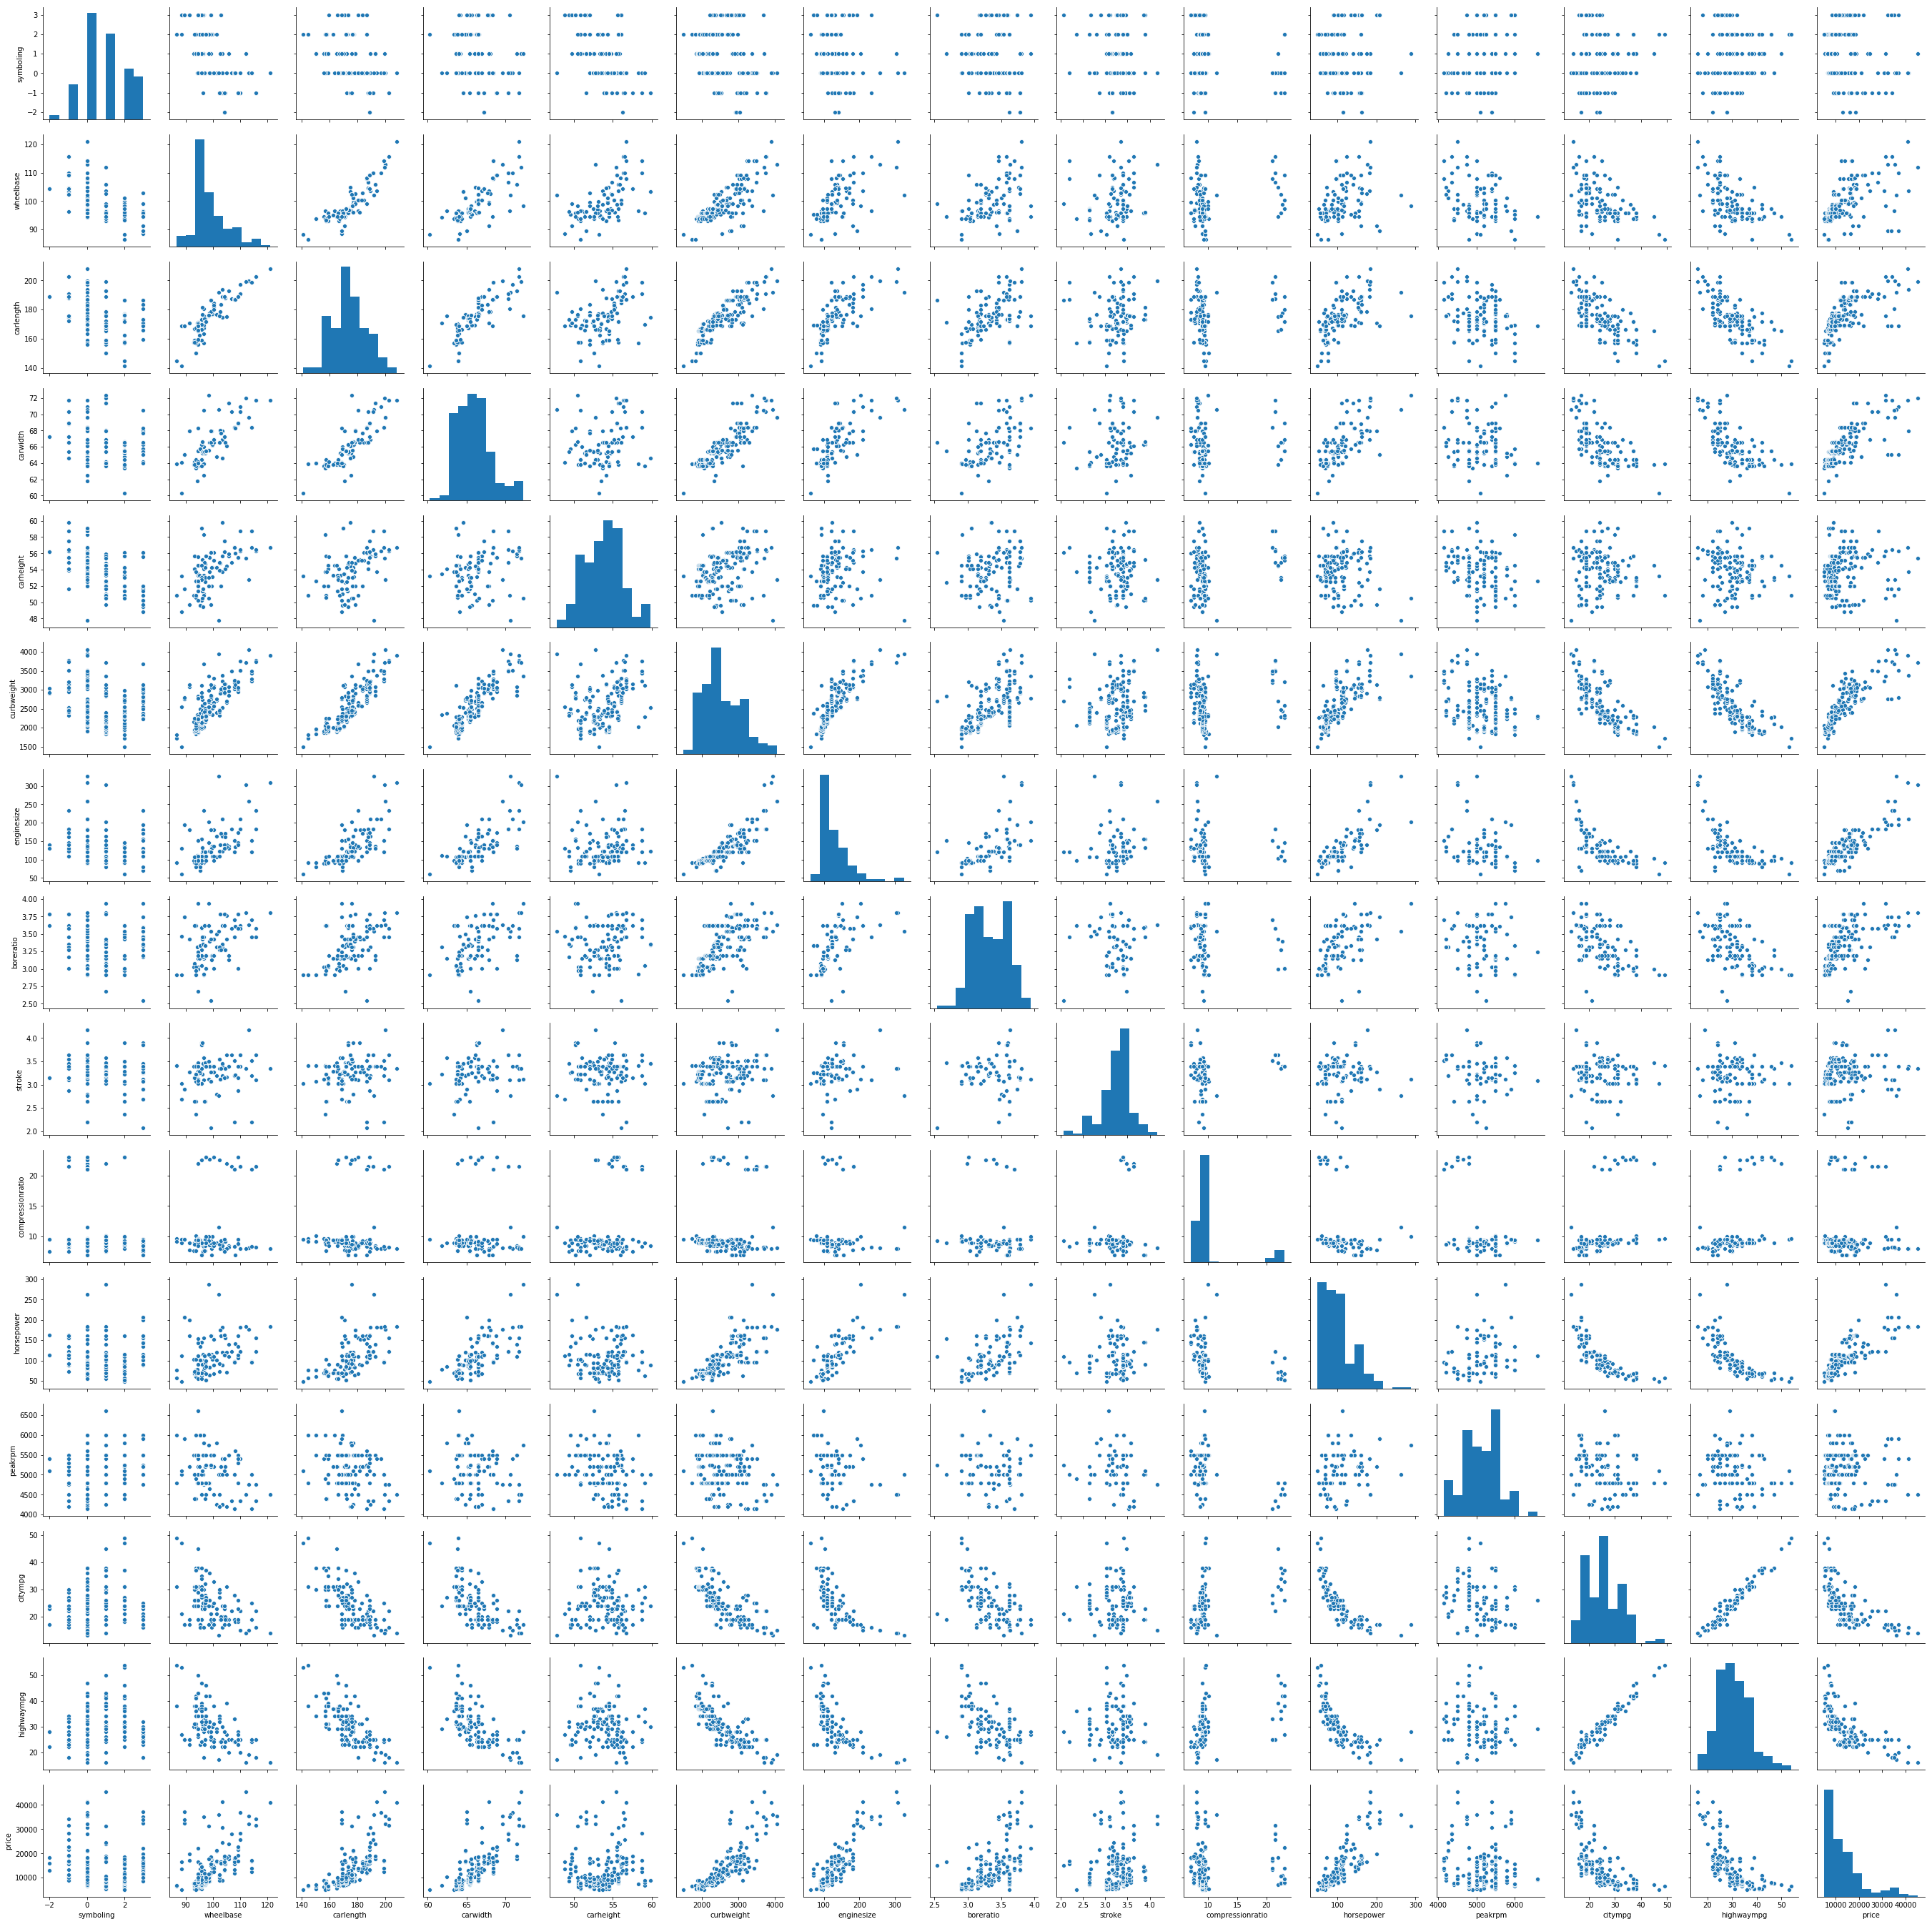

In [17]:

sns.pairplot(car_price)
plt.show()

## Step 3: Data Preparation

In [18]:
car_price.fueltype.unique() 

array(['gas', 'diesel'], dtype=object)

In [19]:
car_price['fueltype']=car_price['fueltype'].map({'gas':1,'diesel':0})

In [20]:
car_price.fueltype

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     0
64     1
65     1
66     0
67     0
68     0
69     0
70     0
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     0
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    0
109    1
110    0
1

In [21]:
car_price.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [22]:
car_price['aspiration']=car_price['aspiration'].map({'std':1,'turbo':0})

In [23]:
car_price['aspiration']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      0
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     0
24     1
25     1
26     1
27     0
28     1
29     0
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     0
68     0
69     0
70     0
71     1
72     1
73     1
74     1
75     0
76     1
77     1
78     1
79     0
80     0
81     1
82     0
83     0
84     0
85     1
86     1
87     0
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    0
106    1
107    1
108    0
109    1
110    0
1

In [24]:
car_price.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'car_brand'], dtype='object')

In [25]:
car_price.doornumber.unique()

array(['two', 'four'], dtype=object)

In [26]:
car_price['doornumber']=car_price['doornumber'].map({'two':0,'four':1})
car_price.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price    car_brand
0          3         1           1           0  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1          3         1           1           0  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2          1         1           1           0    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3          2         1           1           1        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4          2         1           1           1        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [27]:
car_price.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

### Dummy Variables

The variable `carbody` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [28]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'car_type'
car_type = pd.get_dummies(car_price.carbody)

In [29]:
# Check what the dataset 'status' looks like
car_type

convertible  hardtop  hatchback  sedan  wagon
0              1        0          0      0      0
1              1        0          0      0      0
2              0        0          1      0      0
3              0        0          0      1      0
4              0        0          0      1      0
5              0        0          0      1      0
6              0        0          0      1      0
7              0        0          0      0      1
8              0        0          0      1      0
9              0        0          1      0      0
10             0        0          0      1      0
11             0        0          0      1      0
12             0        0          0      1      0
13             0        0          0      1      0
14             0        0          0      1      0
15             0        0          0      1      0
16             0        0          0      1      0
17             0        0          0      1      0
18             0        0          1      0      0
19             0        0          1      0      0
20             0        0          0      1      0
21             0        0          1      0      0
22             0        0          1      0      0
23             0        0          1      0      0
24             0        0          1      0      0
25             0        0          0      1      0
26             0        0          0      1      0
27             0        0          0      1      0
28             0        0          0      0      1
29             0        0          1      0      0
30             0        0          1      0      0
31             0        0          1      0      0
32             0        0          1      0      0
33             0        0          1      0      0
34             0        0          1      0      0
35             0        0          0      1      0
36             0        0          0      0      1
37             0        0          1      0      0
38             0        0          1      0      0
39             0        0          0      1      0
40             0        0          0      1      0
41             0        0          0      1      0
42             0        0          0      1      0
43             0        0          0      1      0
44             0        0          0      1      0
45             0        0          0      1      0
46             0        0          1      0      0
47             0        0          0      1      0
48             0        0          0      1      0
49             0        0          0      1      0
50             0        0          1      0      0
51             0        0          1      0      0
52             0        0          1      0      0
53             0        0          0      1      0
54             0        0          0      1      0
55             0        0          1      0      0
56             0        0          1      0      0
57             0        0          1      0      0
58             0        0          1      0      0
59             0        0          1      0      0
60             0        0          0      1      0
61             0        0          1      0      0
62             0        0          0      1      0
63             0        0          0      1      0
64             0        0          1      0      0
65             0        0          0      1      0
66             0        0          0      1      0
67             0        0          0      1      0
68             0        0          0      0      1
69             0        1          0      0      0
70             0        0          0      1      0
71             0        0          0      1      0
72             1        0          0      0      0
73             0        0          0      1      0
74             0        1          0      0      0
75             0        0          1      0      0
76             0        0          1      0      0
77             0        0  

Now, you don't need three columns. You can drop the `carbody` column, as the type of carbody can be identified with just the last two columns where — 
- `0000` will correspond to `convertible`
- `1000` will correspond to `hardtop`
- `0100` will correspond to `hatchback`
- `0010` will correspond to `sedan`
- `0001` will correspond to `wagon`

In [30]:
# Let's drop the first column from status df using 'drop_first = True'

car_type = pd.get_dummies(car_price['carbody'], drop_first = True)
car_type.head()

hardtop  hatchback  sedan  wagon
0        0          0      0      0
1        0          0      0      0
2        0          1      0      0
3        0          0      1      0
4        0          0      1      0

In [31]:
# Add the results to the original housing dataframe

car_price = pd.concat([car_price, car_type], axis = 1)
car_price

symboling  fueltype  aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon
0            3         1           1           0  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0
1            3         1           1           0  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0
2            1         1           1           0    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0
3            2         1           1           1        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0
4            2         1           1           1        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0
5            2         1           1           0        sedan        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0
6            1         1           1           1        sedan        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0
7            1         1           1           1        wagon        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1
8            1         1           0           1        sedan        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0
9            0         1           0           0    hatchback        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi        0          1      0      0
10           2         1           1           0        sedan        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw        0          0      1      0
11           0         1           1           1        s

In [32]:
# Drop 'furnishingstatus' as we have created the dummies for it

car_price.drop(['carbody'], axis = 1, inplace = True)

In [33]:
car_price

symboling  fueltype  aspiration  doornumber drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon
0            3         1           1           0        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0
1            3         1           1           0        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0
2            1         1           1           0        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0
3            2         1           1           1        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0
4            2         1           1           1        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0
5            2         1           1           0        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0
6            1         1           1           1        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0
7            1         1           1           1        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1
8            1         1           0           1        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0
9            0         1           0           0        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi        0          1      0      0
10           2         1           1           0        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw        0          0      1      0
11           0         1           1           1        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.

In [34]:
car_price.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [35]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheel'
drivewheel = pd.get_dummies(car_price['drivewheel'])
drivewheel.head()

4wd  fwd  rwd
0    0    0    1
1    0    0    1
2    0    0    1
3    0    1    0
4    1    0    0

Now, you don't need three columns. You can drop the `drivewheel` column, as the type of drivewheel can be identified with just the last two columns where — 
- `00` will correspond to `4wd`
- `01` will correspond to `fwd`
- `10` will correspond to `rwd`

In [36]:
# Let's drop the first column from drivewheel df using 'drop_first = True'

drivewheel = pd.get_dummies(car_price['drivewheel'], drop_first = True)
drivewheel.head()

fwd  rwd
0    0    1
1    0    1
2    0    1
3    1    0
4    0    0

In [37]:
# Add the results to the original car_price dataframe

car_price = pd.concat([car_price, drivewheel], axis = 1)
car_price

symboling  fueltype  aspiration  doornumber drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd
0            3         1           1           0        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1
1            3         1           1           0        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1
2            1         1           1           0        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1
3            2         1           1           1        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0
4            2         1           1           1        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0
5            2         1           1           0        fwd          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0
6            1         1           1           1        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0
7            1         1           1           1        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0
8            1         1           0           1        fwd          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0
9            0         1           0           0        4wd          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi        0          1      0      0    0    0
10           2         1           1           0        rwd          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw        0          0      1      0    0    1
11           0         1           1           1        rwd          front      101.2      17

In [38]:
# Drop 'drivewheel' as we have created the dummies for it

car_price.drop(['drivewheel'], axis = 1, inplace = True)
car_price

symboling  fueltype  aspiration  doornumber enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd
0            3         1           1           0          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1
1            3         1           1           0          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1
2            1         1           1           0          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1
3            2         1           1           1          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0
4            2         1           1           1          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0
5            2         1           1           0          front       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0
6            1         1           1           1          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0
7            1         1           1           1          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0
8            1         1           0           1          front      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0
9            0         1           0           0          front       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi        0          1      0      0    0    0
10           2         1           1           0          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw        0          0      1      0    0    1
11           0         1           1           1          front      101.2      176.8      64.8       54.3        2395        ohc           four         108       mpfi       3.50   2.800              8.80         101     5800

In [39]:
car_price.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [40]:
car_price['enginelocation']=car_price['enginelocation'].map({'front':1,'rear':0})
car_price.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd
0          3         1           1           0               1       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero        0          0      0      0    0    1
1          3         1           1           0               1       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero        0          0      0      0    0    1
2          1         1           1           0               1       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero        0          1      0      0    0    1
3          2         1           1           1               1       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi        0          0      1      0    1    0
4          2         1           1           1               1       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi        0          0      1      0    0    0

In [41]:
car_price.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [42]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'car_type'
enginetype = pd.get_dummies(car_price.enginetype)
enginetype.head()

dohc  dohcv  l  ohc  ohcf  ohcv  rotor
0     1      0  0    0     0     0      0
1     1      0  0    0     0     0      0
2     0      0  0    0     0     1      0
3     0      0  0    1     0     0      0
4     0      0  0    1     0     0      0

Now, you don't need three columns. You can drop the `enginetype` column, as the type of carbody can be identified with just the last two columns where — 
- `000000` will correspond to `dohc`
- `100000` will correspond to `dohcv`
- `010000` will correspond to `l`
- `001000` will correspond to `ohc`
- `000100` will correspond to `ohcf`
- `000010` will correspond to `ohcv`
- `000001` will correspond to `rotor`

In [43]:
# Let's drop the first column from enginetype df using 'drop_first = True'

enginetype = pd.get_dummies(car_price['enginetype'], drop_first = True)
enginetype.head()

dohcv  l  ohc  ohcf  ohcv  rotor
0      0  0    0     0     0      0
1      0  0    0     0     0      0
2      0  0    0     0     1      0
3      0  0    1     0     0      0
4      0  0    1     0     0      0

In [44]:
# Add the results to the original car_price dataframe

car_price = pd.concat([car_price, enginetype], axis = 1)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0      0  0    1     0     0      0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
6            1         1           1           1               1      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
7            1         1           1           1               1      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0      0  0    1     0     0      0
8            1         1           0           1               1      105.8      192.7      71.4       55.9        3086        ohc           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
9            0         1           0           0               1       99.5      178.2      67.9       52.0        3053        ohc           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi        0          1      0      0    0    0      0  0    1     0     0      0
10           2         1           1           0               1      101.2      176.8      64.8       54.3        2395        ohc           four         1

In [45]:
# Drop 'drivewheel' as we have created the dummies for it

car_price.drop(['enginetype'], axis = 1, inplace = True)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0      0  0    1     0     0      0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
6            1         1           1           1               1      105.8      192.7      71.4       55.7        2844           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
7            1         1           1           1               1      105.8      192.7      71.4       55.7        2954           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0      0  0    1     0     0      0
8            1         1           0           1               1      105.8      192.7      71.4       55.9        3086           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0      0  0    1     0     0      0
9            0         1           0           0               1       99.5      178.2      67.9       52.0        3053           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi        0          1      0      0    0    0      0  0    1     0     0      0
10           2         1           1           0               1      101.2      176.8      64.8       54.3        2395           four         108       mpfi       3.50   2.800              8.80         101     5800       23          29  16430.000          bmw        0       

In [46]:
car_price.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [47]:
# car_price['cylindernumber']=car_price['cylindernumber'].map({'four':4,'six':6,'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'car_type'
cylindernumber = pd.get_dummies(car_price.cylindernumber)
cylindernumber.head()

eight  five  four  six  three  twelve  two
0      0     0     1    0      0       0    0
1      0     0     1    0      0       0    0
2      0     0     0    1      0       0    0
3      0     0     1    0      0       0    0
4      0     1     0    0      0       0    0

In [48]:
# Let's drop the first column from fuelsystem df using 'drop_first = True'

cylindernumber = pd.get_dummies(car_price['cylindernumber'], drop_first = True)
cylindernumber.head()

five  four  six  three  twelve  two
0     0     1    0      0       0    0
1     0     1    0      0       0    0
2     0     0    1      0       0    0
3     0     1    0      0       0    0
4     1     0    0      0       0    0

In [49]:
# Add the results to the original car_price dataframe

car_price = pd.concat([car_price, cylindernumber], axis = 1)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548           four         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823            six         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337           four         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824           five         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0
6            1         1           1           1               1      105.8      192.7      71.4       55.7        2844           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0
7            1         1           1           1               1      105.8      192.7      71.4       55.7        2954           five         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0      0  0    1     0     0      0     1     0    0      0       0    0
8            1         1           0           1               1      105.8      192.7      71.4       55.9        3086           five         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0
9            0         1           0           0               1       99.5      178.2      67.9       52.0        3053           five         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.1

In [50]:
# Drop 'drivewheel' as we have created the dummies for it

car_price.drop(['cylindernumber'], axis = 1, inplace = True)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0
6            1         1           1           1               1      105.8      192.7      71.4       55.7        2844         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0
7            1         1           1           1               1      105.8      192.7      71.4       55.7        2954         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0      0  0    1     0     0      0     1     0    0      0       0    0
8            1         1           0           1               1      105.8      192.7      71.4       55.9        3086         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0
9            0         1           0           0               1       99.5      178.2      67.9       52.0        3053         131       mpfi       3.13   3.400              7.00         160     5500       16          22  17859.167         audi        0          1      0      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0
10           2         1          

In [51]:
car_price.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [52]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'car_type'
enginetype = pd.get_dummies(car_price.fuelsystem)
enginetype.head()

1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0     0     0     0    0    0     1     0     0
1     0     0     0    0    0     1     0     0
2     0     0     0    0    0     1     0     0
3     0     0     0    0    0     1     0     0
4     0     0     0    0    0     1     0     0

Now, you don't need three columns. You can drop the `fuelsystem` column, as the type of fuelsystem can be identified with just the last two columns where — 
- `0000000` will correspond to `1bbl`
- `1000000` will correspond to `2bbl`
- `0100000` will correspond to `4bbl`
- `0010000` will correspond to `idi`
- `000100` will correspond to `mfi`
- `0000100` will correspond to `mpfi`
- `0000010` will correspond to `spdi`
- `0000001` will correspond to `spfi`

In [53]:
# Let's drop the first column from fuelsystem df using 'drop_first = True'

fuelsystem = pd.get_dummies(car_price['fuelsystem'], drop_first = True)
fuelsystem.head()

2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0     0     0    0    0     1     0     0
1     0     0    0    0     1     0     0
2     0     0    0    0     1     0     0
3     0     0    0    0     1     0     0
4     0     0    0    0     1     0     0

In [54]:
# Add the results to the original car_price dataframe

car_price = pd.concat([car_price, fuelsystem], axis = 1)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       mpfi       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       mpfi       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823         152       mpfi       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0     0     0    0    0     1     0     0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337         109       mpfi       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824         136       mpfi       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507         136       mpfi       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
6            1         1           1           1               1      105.8      192.7      71.4       55.7        2844         136       mpfi       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
7            1         1           1           1               1      105.8      192.7      71.4       55.7        2954         136       mpfi       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
8            1         1           0           1               1      105.8      192.7      71.4       55.9        3086         131       mpfi       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0  

In [55]:
# Drop 'drivewheel' as we have created the dummies for it

car_price.drop(['fuelsystem'], axis = 1, inplace = True)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823         152       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0     0     0    0    0     1     0     0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337         109       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824         136       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507         136       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
6            1         1           1           1               1      105.8      192.7      71.4       55.7        2844         136       3.19   3.400              8.50         110     5500       19          25  17710.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
7            1         1           1           1               1      105.8      192.7      71.4       55.7        2954         136       3.19   3.400              8.50         110     5500       19          25  18920.000         audi        0          0      0      1    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
8            1         1           0           1               1      105.8      192.7      71.4       55.9        3086         131       3.13   3.400              8.30         140     5500       17          20  23875.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0
9            0         1           0           0               1       99.5      178.2      67.9       52

In [56]:
car_price.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0          3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
1          3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
2          1         1           1           0               1       94.5      171.2      65.5       52.4        2823         152       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0     0     0    0    0     1     0     0
3          2         1           1           1               1       99.8      176.6      66.2       54.3        2337         109       3.19    3.40              10.0         102     5500       24          30  13950.0         audi        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0
4          2         1           1           1               1       99.4      176.6      66.4       54.3        2824         136       3.19    3.40               8.0         115     5500       18          22  17450.0         audi        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0

In [57]:
car_price.car_brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen',
       'volvo'], dtype=object)

In [58]:
# Get the dummy variables for the feature 'car_brand' and store it in a new variable - 'car_brand'
car_brand = pd.get_dummies(car_price.car_brand)
car_brand.head()

alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  toyouta  volkswagen  volvo
0            1     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
1            1     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
2            1     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
3            0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
4            0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0

In [59]:
# Let's drop the first column from fuelsystem df using 'drop_first = True'

car_brand = pd.get_dummies(car_price['car_brand'], drop_first = True)
car_brand.head()

audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  toyouta  volkswagen  volvo
0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
1     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
2     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
3     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
4     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0

In [60]:
car_brand.shape

(205, 23)

In [61]:
# Add the results to the original car_price dataframe

car_price = pd.concat([car_price, car_brand], axis = 1)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price    car_brand  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  toyouta  volkswagen  volvo
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47   2.680              9.00         111     5000       21          27  13495.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47   2.680              9.00         111     5000       21          27  16500.000  alfa-romero        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823         152       2.68   3.470              9.00         154     5000       19          26  16500.000  alfa-romero        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337         109       3.19   3.400             10.00         102     5500       24          30  13950.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824         136       3.19   3.400              8.00         115     5500       18          22  17450.000         audi        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507         136       3.19   3.400              8.50         110     5500       19          25  15250.000         audi        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0    

In [62]:
# Drop 'drivewheel' as we have created the dummies for it

car_price.drop(['car_brand'], axis = 1, inplace = True)
car_price

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  toyouta  volkswagen  volvo
0            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47   2.680              9.00         111     5000       21          27  13495.000        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
1            3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47   2.680              9.00         111     5000       21          27  16500.000        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
2            1         1           1           0               1       94.5      171.2      65.5       52.4        2823         152       2.68   3.470              9.00         154     5000       19          26  16500.000        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
3            2         1           1           1               1       99.8      176.6      66.2       54.3        2337         109       3.19   3.400             10.00         102     5500       24          30  13950.000        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
4            2         1           1           1               1       99.4      176.6      66.4       54.3        2824         136       3.19   3.400              8.00         115     5500       18          22  17450.000        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
5            2         1           1           0               1       99.8      177.3      66.3       53.1        2507         136       3.19   3.400              8.50         110     5500       19          25  15250.000        0          0      1      0    1    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
6            1         1           1           1  

In [63]:
car_price.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  toyouta  volkswagen  volvo
0          3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47    2.68               9.0         111     5000       21          27  13495.0        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
1          3         1           1           0               1       88.6      168.8      64.1       48.8        2548         130       3.47    2.68               9.0         111     5000       21          27  16500.0        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
2          1         1           1           0               1       94.5      171.2      65.5       52.4        2823         152       2.68    3.47               9.0         154     5000       19          26  16500.0        0          1      0      0    0    1      0  0    0     0     1      0     0     0    1      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
3          2         1           1           1               1       99.8      176.6      66.2       54.3        2337         109       3.19    3.40              10.0         102     5500       24          30  13950.0        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
4          2         1           1           1               1       99.4      176.6      66.4       54.3        2824         136       3.19    3.40               8.0         115     5500       18          22  17450.0        0          0      1      0    0    0      0  0    1     0     0      0     1     0    0      0       0    0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0

In [64]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               2

In [65]:
car_price.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo'], dtype='object')

In [66]:
car_price.shape

(205, 67)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [67]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
car_price.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo'], dtype='object')

In [71]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'wheelbase', 
            'carlength', 'carwidth', 'carheight', 
            'curbweight',  'enginesize',
            'boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [72]:
df_train

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price  hardtop  hatchback  sedan  wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  toyouta  volkswagen  volvo
122          1         1           1           1               1   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   0.230159  0.525253          0.150000    0.083333  0.551020  0.500000    0.567568  0.068818        0          0      1      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         1        0        0     0       0       0        0           0      0
125          3         1           1           0               1   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   1.000000  0.464646          0.156250    0.395833  0.551020  0.166667    0.270270  0.466890        0          1      0      0    0    1      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        1        0     0       0       0        0           0      0
166          1         1           1           0               1   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   0.444444  0.449495          0.150000    0.266667  1.000000  0.361111    0.324324  0.122110        0          1      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       1        0           0      0
1            3         1           1           0               1   0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   0.626984  0.247475          0.125000    0.262500  0.346939  0.222222    0.270270  0.314446        0          0      0      0    0    1      0  0    0     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      0
199         -1         1           0           1               1   0.610345   0.775610  0.575000   0.858407    0.647401    0.260377   0.746032  0.484848          0.031250    0.475000  0.387755  0.111111    0.135135  0.382131        0          0      0      1    0    1      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           0      1
190          3         1           1           0               1   0.272414   0.400000  0.308333   0.318584    0.284329    0.181132   0.404762  0.611111          0.093750    0.175000  0.551020  0.305556    0.324324  0.134321        0          1      0      0    1    0      0  0    1     0     0      0     0     1    0      0       0    0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0        0           1      0
96           1         1     

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 67 columns):
symboling           143 non-null int64
fueltype            143 non-null int64
aspiration          143 non-null int64
doornumber          143 non-null int64
enginelocation      143 non-null int64
wheelbase           143 non-null float64
carlength           143 non-null float64
carwidth            143 non-null float64
carheight           143 non-null float64
curbweight          143 non-null float64
enginesize          143 non-null float64
boreratio           143 non-null float64
stroke              143 non-null float64
compressionratio    143 non-null float64
horsepower          143 non-null float64
peakrpm             143 non-null float64
citympg             143 non-null float64
highwaympg          143 non-null float64
price               143 non-null float64
hardtop             143 non-null uint8
hatchback           143 non-null uint8
sedan               143 non-null uint8
wagon    

In [74]:
df_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation   wheelbase   carlength    carwidth   carheight  curbweight  enginesize   boreratio      stroke  compressionratio  horsepower     peakrpm     citympg  highwaympg       price     hardtop   hatchback       sedan       wagon         fwd         rwd       dohcv           l         ohc        ohcf        ohcv       rotor        five        four         six       three      twelve         two        2bbl        4bbl         idi    mfi        mpfi        spdi   spfi        audi         bmw       buick   chevrolet       dodge       honda       isuzu      jaguar       maxda       mazda  mercury  mitsubishi      nissan     peugeot    plymouth     porsche     renault        saab      subaru      toyota     toyouta  volkswagen       volvo
count  143.000000  143.000000  143.000000  143.000000      143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000        143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.0  143.000000  143.000000  143.0  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000    143.0  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000
mean     0.797203    0.909091    0.818182    0.559441        0.993007    0.411141    0.525476    0.461655    0.509004    0.407878    0.241351    0.497946    0.535389          0.190787    0.227302    0.400029    0.344211    0.374976    0.219310    0.020979    0.342657    0.475524    0.132867    0.594406    0.349650    0.006993    0.062937    0.685315    0.083916    0.062937    0.027972    0.062937    0.741259    0.132867    0.006993    0.006993    0.027972    0.349650    0.020979    0.090909    0.0    0.440559    0.041958    0.0    0.034965    0.041958    0.034965    0.020979    0.041958    0.062937    0.020979    0.020979    0.013986    0.076923      0.0    0.062937    0.097902    0.055944    0.027972    0.020979    0.013986    0.020979    0.076923    0.132867    0.006993    0.048951    0.041958
std      1.195999    0.288490    0.387050    0.498199        0.083624    0.205581    0.204848    0.184517    0.215378    0.211269    0.154619    0.207140    0.157843          0.237181    0.165511    0.196438    0.186165    0.188477    0.215682    0.143818    0.476266    0.501156    0.340624    0.492733    0.478536    0.083624    0.243703    0.466023    0.278236    0.243703    0.165472    0.243703    0.439483    0.340624    0.083624    0.083624    0.165472    0.478536    0.143818    0.288490    0.0    0.498199    0.201198    0.0    0.184337    0.201198    0.184337    0.143818    0.201198    0.243703    0.143818    0.143818    0.117845    0.267406      0.0    0.243703    0.298227    0.230621    0.165472    0.143818    0.117845    0.143818    0.267406    0.340624    0.083624    0.216524    0.201198
min     -2.000000    0.000000    0.000000    0.000000        0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000          0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.0    0.000000    0.000000    0.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000      0.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.0000

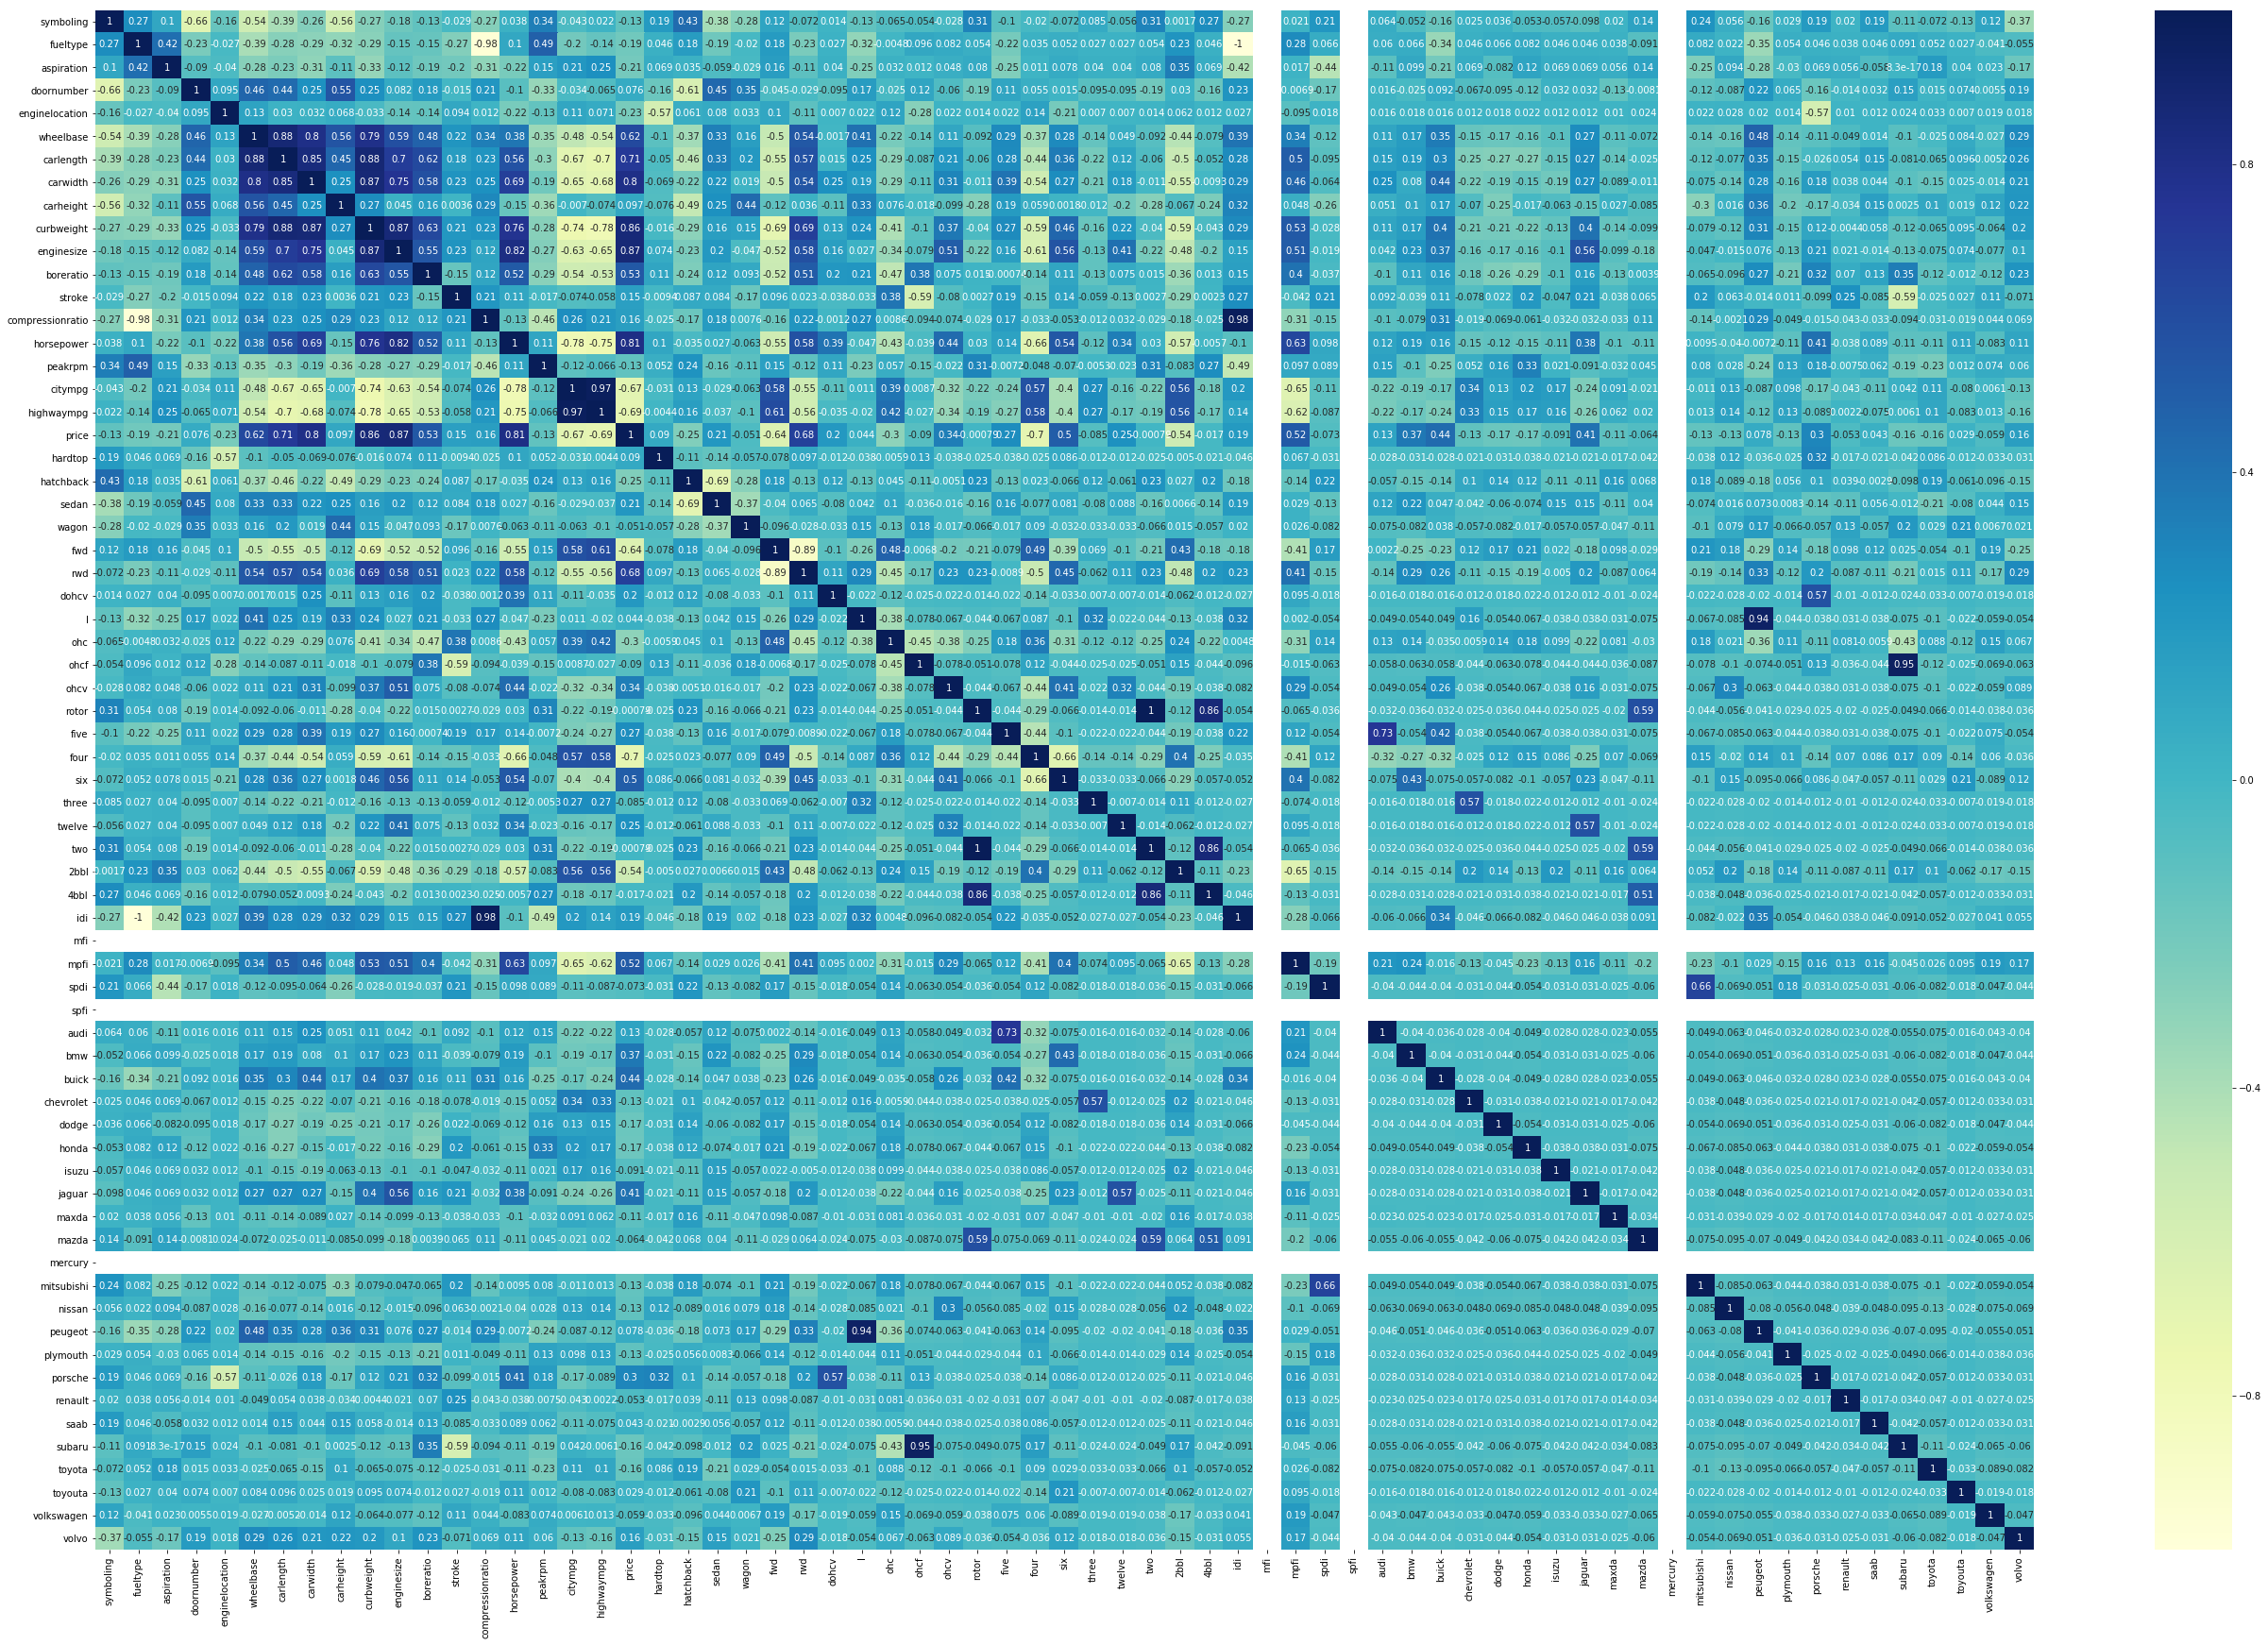

In [75]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (46, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As I have noticed, `enginesize` seems to the correlated to `price` the most. Let's see a pairplot for `enginesize` vs `price`.

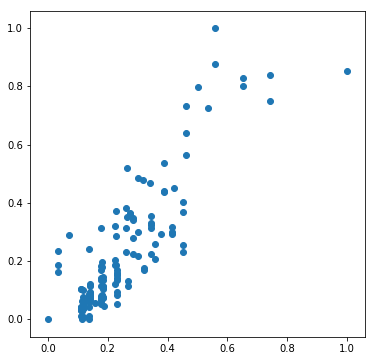

In [76]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

So, we pick `enginesize` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [77]:
y_train = df_train.pop('price')
X_train = df_train
X_train.shape

(143, 66)

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [78]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [79]:
# Running RFE with the output number of the variable equal to 11
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 57),
 ('fueltype', False, 25),
 ('aspiration', False, 14),
 ('doornumber', False, 49),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 37),
 ('highwaympg', False, 27),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('fwd', False, 51),
 ('rwd', False, 40),
 ('dohcv', False, 12),
 ('l', False, 7),
 ('ohc', False, 53),
 ('ohcf', False, 10),
 ('ohcv', False, 38),
 ('rotor', True, 1),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 29),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 3),
 ('2bbl', False, 34),
 ('4bbl', False, 39),
 ('idi', False, 24),
 ('mfi', False, 54),
 ('mpfi', False, 50),
 ('spdi', False

In [81]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'rotor', 'three', 'twelve', 'bmw', 'porsche'], dtype='object')

In [82]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four', 'six', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo'], dtype='object')

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [83]:
import statsmodels.api as sm

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [84]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [85]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [86]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.21e-64
Time:                        19:21:52   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1704      0.084      2.

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0            const  230.92
3       curbweight    9.26
4       enginesize    7.23
2         carwidth    4.92
5        boreratio    1.85
10         porsche    1.82
1   enginelocation    1.66
8           twelve    1.49
6            rotor    1.24
9              bmw    1.13
7            three    1.05

In [88]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [89]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [90]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [91]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.18e-65
Time:                        19:21:53   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

In [92]:
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)

In [93]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [94]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [95]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.30e-63
Time:                        19:21:53   Log-Likelihood:                 182.79
No. Observations:                 143   AIC:                            -347.6
Df Residuals:                     134   BIC:                            -320.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1445      0.019     -7.578      0.0

In [96]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  10.72
2  curbweight   8.58
3  enginesize   5.03
1    carwidth   4.53
4   boreratio   1.85
8     porsche   1.22
5       rotor   1.17
7         bmw   1.09
6       three   1.05

####  "curbweight" is highly correlated with enginesize, so dropping from model

In [97]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [98]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [99]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [100]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     154.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.31e-61
Time:                        19:21:54   Log-Likelihood:                 174.10
No. Observations:                 143   AIC:                            -332.2
Df Residuals:                     135   BIC:                            -308.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1638      0.020     -8.369      0.0

In [101]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  10.08
2  enginesize   2.92
1    carwidth   2.82
3   boreratio   1.70
4       rotor   1.13
7     porsche   1.13
6         bmw   1.09
5       three   1.05

####  "boreratio" is highly correlated with enginesize, so dropping from model

In [102]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

In [103]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [104]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [105]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.72e-62
Time:                        19:21:55   Log-Likelihood:                 172.61
No. Observations:                 143   AIC:                            -331.2
Df Residuals:                     136   BIC:                            -310.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1786      0.018    -10.134      0.0

In [106]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0       const  8.07
2  enginesize  2.83
1    carwidth  2.60
3       rotor  1.12
5         bmw  1.09
4       three  1.05
6     porsche  1.05

####  "carwidth" is highly correlated with enginesize, so dropping from model

In [107]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [109]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [110]:
# #Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.21e-53
Time:                        19:21:56   Log-Likelihood:                 148.35
No. Observations:                 143   AIC:                            -284.7
Df Residuals:                     137   BIC:                            -266.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0847      0.014     -5.856      0.0

In [111]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0       const  3.90
1  enginesize  1.19
4         bmw  1.06
2       rotor  1.05
5     porsche  1.05
3       three  1.02

#### Dropping "three' from the model

In [112]:
X_train_new = X_train_new.drop(["three"], axis = 1)

In [113]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [114]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [115]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.97e-54
Time:                        19:21:56   Log-Likelihood:                 147.87
No. Observations:                 143   AIC:                            -285.7
Df Residuals:                     138   BIC:                            -270.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0825      0.014     -5.778      0.0

In [116]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0       const  3.80
1  enginesize  1.16
3         bmw  1.06
2       rotor  1.05
4     porsche  1.05

### Conclusion:

- #### enginesize, bmw, rotor and porsche are the predictors variable for price.


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [117]:
y_train_price = lm.predict(X_train_lm)

In [118]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

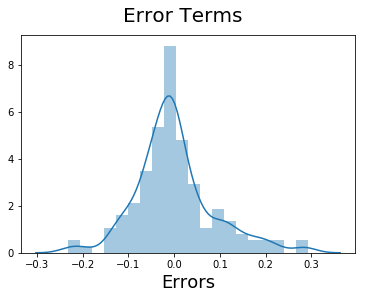

In [119]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Conclusion:
- #### in graph error disribution looks uniform so model is good for price prediction

## Making Predictions

In [120]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'wheelbase', 
            'carlength', 'carwidth', 'carheight', 
            'curbweight',  'enginesize',
            'boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Dividing into X_test and y_test

In [121]:
y_test = df_test.pop('price')
X_test = df_test

In [122]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['enginesize', 'rotor', 'bmw', 'porsche']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [123]:
X_train_new.columns

Index(['const', 'enginesize', 'rotor', 'bmw', 'porsche'], dtype='object')

In [124]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

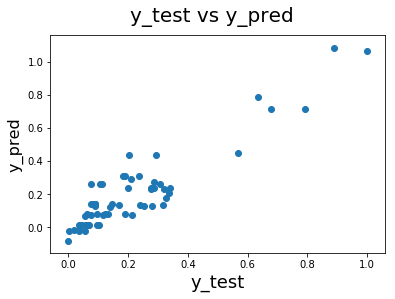

In [125]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

## Model Evaluation:

When you're done with model building and residual analysis, and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

In [126]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),3)

0.798

### R-squared score is 0.798

## Conclusion:
#### - Which variables are significant in predicting the price of a car
     - 'enginesize', 
     - 'rotor', 
     - 'bmw', 
     - 'porsche'
     The above variables are positively correllated with price of the car.
#### - How well those variables describe the price of a car
      These variables will increase the price of the car. So, increase in the value of these variable will impact the increase in the car price too.